[[0.    0.    1.    0.    0.    1.    0.    1.    0.    0.    1.    0.
  1.    0.    0.    1.    0.    0.697 0.46  1.   ]
 [1.    0.    0.    0.    0.    1.    1.    0.    0.    0.    1.    0.
  1.    0.    0.    1.    0.    0.774 0.376 1.   ]
 [1.    0.    0.    0.    0.    1.    0.    1.    0.    0.    1.    0.
  1.    0.    0.    1.    0.    0.634 0.264 1.   ]
 [0.    0.    1.    0.    0.    1.    1.    0.    0.    0.    1.    0.
  1.    0.    0.    1.    0.    0.608 0.318 1.   ]
 [0.    1.    0.    0.    0.    1.    0.    1.    0.    0.    1.    0.
  1.    0.    0.    1.    0.    0.556 0.215 1.   ]
 [0.    0.    1.    0.    1.    0.    0.    1.    0.    0.    1.    0.
  0.    0.    1.    0.    1.    0.403 0.237 1.   ]
 [1.    0.    0.    0.    1.    0.    0.    1.    0.    0.    0.    1.
  0.    0.    1.    0.    1.    0.481 0.149 1.   ]
 [1.    0.    0.    0.    1.    0.    0.    1.    0.    0.    1.    0.
  0.    0.    1.    1.    0.    0.437 0.211 1.   ]
 [1.    0.    0.    0.  

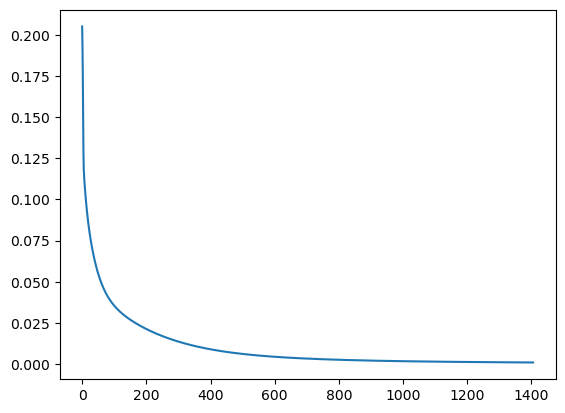

g =  [5.16835163e-05]
g =  [7.75528338e-05]
g =  [5.23676073e-06]
g =  [0.0011856]
g =  [3.10661029e-05]
g =  [2.12967072e-05]
g =  [5.57221841e-07]
g =  [5.44357442e-06]
g =  [-0.00234401]
g =  [-0.05041563]
g =  [-0.02036264]
g =  [-0.01112498]
g =  [-0.0310216]
g =  [-0.06210284]
g =  [-0.00150522]
g =  [-0.01198473]
g =  [-0.00487093]
g =  [7.15543542e-05]
g =  [0.00010098]
g =  [6.95587396e-06]
g =  [0.00171639]
g =  [4.15544621e-05]
g =  [2.97489377e-05]
g =  [7.10987634e-07]
g =  [7.52846095e-06]
g =  [-0.00273955]
g =  [-0.03916442]
g =  [-0.01648992]
g =  [-0.01252628]
g =  [-0.03466174]
g =  [-0.06795015]
g =  [-0.00172808]
g =  [-0.01399786]
g =  [-0.0057364]
g =  [9.69821354e-05]
g =  [0.0001305]
g =  [9.14915234e-06]
g =  [0.00243139]
g =  [5.47956086e-05]
g =  [4.06130348e-05]
g =  [8.94136569e-07]
g =  [1.02685986e-05]
g =  [-0.0031924]
g =  [-0.03098201]
g =  [-0.01356041]
g =  [-0.01402473]
g =  [-0.03860092]
g =  [-0.07392665]
g =  [-0.00197603]
g =  [-0.01626204]
g =

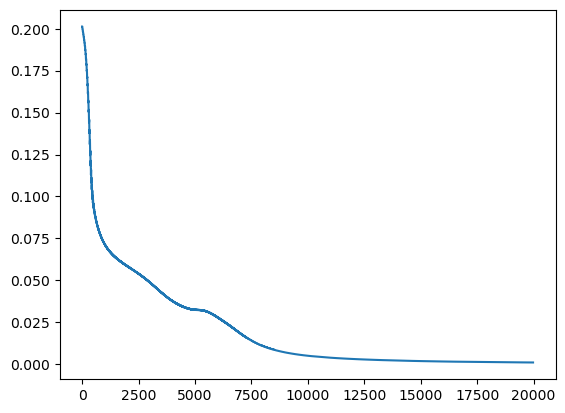

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
import operator

# 特征字典，后面用到了好多次，干脆当全局变量了
featureDic = {
    '色泽': ['浅白', '青绿', '乌黑'],
    '根蒂': ['硬挺', '蜷缩', '稍蜷'],
    '敲声': ['沉闷', '浊响', '清脆'],
    '纹理': ['清晰', '模糊', '稍糊'],
    '脐部': ['凹陷', '平坦', '稍凹'],
    '触感': ['硬滑', '软粘']}


def getDataSet():
    """
    get watermelon data set 3.0 alpha.
    :return: 编码好的数据集以及特征的字典。
    """
    dataSet = [
        ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.697, 0.460, 1],
        ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.774, 0.376, 1],
        ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.634, 0.264, 1],
        ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.608, 0.318, 1],
        ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.556, 0.215, 1],
        ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.403, 0.237, 1],
        ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', 0.481, 0.149, 1],
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', 0.437, 0.211, 1],
        ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', 0.666, 0.091, 0],
        ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', 0.243, 0.267, 0],
        ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', 0.245, 0.057, 0],
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', 0.343, 0.099, 0],
        ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', 0.639, 0.161, 0],
        ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', 0.657, 0.198, 0],
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.360, 0.370, 0],
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', 0.593, 0.042, 0],
        ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', 0.719, 0.103, 0]
    ]

    features = ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '密度', '含糖量']
    # features = ['color', 'root', 'knocks', 'texture', 'navel', 'touch', 'density', 'sugar']

    # #得到特征值字典，本来用这个生成的特征字典，还是直接当全局变量方便
    # featureDic = {}
    # for i in range(len(features)):
    #     featureList = [example[i] for example in dataSet]
    #     uniqueFeature = list(set(featureList))
    #     featureDic[features[i]] = uniqueFeature

    # 每种特征的属性个数
    numList = []  # [3, 3, 3, 3, 3, 2]
    for i in range(len(features) - 2):
        numList.append(len(featureDic[features[i]]))

    dataSet = np.array(dataSet)
    return dataSet[:, :-1], dataSet[:, -1], features


# data, classLabel, feature = getDataSet()
# print(data)
# print(classLabel)
# print(feature)


def newData():
    """
    利用pandas将分类变量转化为数值变量。将分类变量进行one-hot编码。
    :return: 变量全为数值的变量，以及新的特征标签。
    """
    dataSet, classLabel, features = getDataSet()
    df = pd.DataFrame(dataSet)
    df.columns = features
    # 类别变量转化为数字变量
    # features = ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '密度', '含糖量']
    # features = ['color', 'root', 'knocks', 'texture', 'navel', 'touch', 'density', 'sugar']
    # 色泽
    color = pd.get_dummies(df.色泽, prefix="色泽")
    # 根蒂
    root = pd.get_dummies(df.根蒂, prefix="根蒂")
    # 敲声
    knocks = pd.get_dummies(df.敲声, prefix="敲声")
    # 纹理
    texture = pd.get_dummies(df.纹理, prefix="纹理")
    # 脐部
    navel = pd.get_dummies(df.脐部, prefix="脐部")
    # 触感
    touch = pd.get_dummies(df.触感, prefix="触感")
    # 密度和含糖量
    densityAndsugar = pd.DataFrame()
    densityAndsugar["密度"] = df.密度
    densityAndsugar["含糖量"] = df.含糖量
    # 融合
    newData = pd.concat([color, root, knocks, texture, navel, touch, densityAndsugar], axis=1)
    # print("newData", newData)
    newFeatures = list(newData.columns)
    newData = np.asarray(newData, dtype="float64")
    classLabel = np.asarray(classLabel, dtype="int").reshape(-1, 1)

    # 新的特征数据和类融合
    newDataSet = np.concatenate((newData, classLabel), axis=1)
    # # 在第一列添加1
    # newDataSet = np.insert(newDataSet, 0,
    #                        np.ones(dataSet.shape[0]),
    #                        axis=1)

    return newDataSet, newFeatures


# Sigmoid 函数
def sigmoid(Z):
    return 1.0 / (1 + np.exp(-Z))


# 神经网络累计BP
def NNetworkBP(dataSet, eta, thresh):
    """
    :param dataSet: 数据集. m x n
    :param eta: 学习率
    :return:
    """
    errHistory = []     # 记录每轮迭代的均方误差
    y = dataSet[:, -1].reshape(-1, 1)
    x = dataSet[:, :-1]
    m, n = x.shape
    # 隐层参数
    v = np.random.randn(n, n + 1)
    # 输出层参数
    w = np.random.randn(n + 1, 1)
    # 隐层阈值
    gamma = np.random.randn(1, n + 1)
    # 输出值
    theta = np.random.random(1)

    err = errOfMeanSqur(dataSet, v, gamma, w, theta)
    while err > thresh:
        b = sigmoid(np.dot(x, v) - gamma)  # m x (n+1)
        beta = np.dot(b, w)     # m x 1
        # 预测值
        yHat = sigmoid(beta - theta)    # m x 1
        # 输出层神经元梯度项
        g = yHat * (1 - yHat) * (y - yHat)  # m x 1
        # 隐层神经元梯度向
        e = b * (1 - b) * np.dot(g, w.T)    # m x (n+1)
        # 更新w, v, theta, gamma
        w += eta * np.dot(b.T, g)
        v += eta * np.dot(x.T, e)
        theta -= eta * g.sum()
        gamma -= eta * e.sum(axis=0)

        err = errOfMeanSqur(dataSet, v, gamma, w, theta)
        errHistory.append(err)

    return v, gamma, w, theta, errHistory


# 神经网络累计BP
def NNetworkABP(dataSet, eta, thresh):
    """
    :param dataSet: 数据集. m x n
    :param eta: 学习率
    :return:
    """
    errHistory = []     # 记录每轮迭代的均方误差
    y = dataSet[:, -1].reshape(-1, 1)
    x = dataSet[:, :-1]
    m, n = x.shape
    # 隐层参数
    v = np.random.randn(n, n + 1)
    # 输出层参数
    w = np.random.randn(n + 1, 1)
    # 隐层阈值
    gamma = np.random.randn(1, n + 1)
    # 输出值
    theta = np.random.random(1)

    err = errOfMeanSqur(dataSet, v, gamma, w, theta)
    while err > thresh:
        for i in range(m):
            b = sigmoid(np.dot(x[i], v) - gamma)  # 1 x (n+1)
            beta = np.dot(b, w)[0]     # 1
            # 预测值
            yHat = sigmoid(beta - theta)  # 1
            # 输出层神经元梯度项
            g = yHat * (1 - yHat) * (y[i] - yHat)  # 1
            print("g = ", g)
            # 隐层神经元梯度向
            e = b * (1 - b) * g * w.T.sum()   # 1 x (n+1)
            # 更新w, v, theta, gamma
            w += eta * b.T * g
            v += eta * np.dot(x[i].reshape(n, -1), e)
            theta -= eta * g
            gamma -= eta * e

            err = errOfMeanSqur(dataSet, v, gamma, w, theta)
            errHistory.append(err)

    return v, gamma, w, theta, errHistory


def classify(data, v, gamma, w, theta):
    b = sigmoid(np.dot(data, v) - gamma)
    beta = np.dot(b, w)
    yHat = sigmoid(beta - theta)
    return yHat[0][0]


def errOfMeanSqur(dataSet, v, gamma, w, theta):
    x = dataSet[:, :-1]
    y = dataSet[:, -1]
    num = x.shape[0]
    err = 0.0
    for i in range(num):
        yPre = classify(dataSet[i][:-1], v, gamma, w, theta)
        err += ((y[i] - yPre) ** 2) / 2.0

    return err / float(num)



def main():
    # # test NNetwork
    dataSet, _ = newData()
    print(dataSet)
    v1, gamma1, w1, theta1, errHistory1 = NNetworkBP(dataSet, 0.1, 0.001)
    # 画图
    plt.plot(np.arange(len(errHistory1)), errHistory1)
    plt.show()
    # test NNetworkABP(dataSet, eta, thresh)
    v2, gamma2, w2, theta2, errHistory2 = NNetworkABP(dataSet, 0.1, 0.001)
    plt.plot(np.arange(len(errHistory2)), errHistory2)
    plt.show()
    

if __name__ == '__main__':
    main()

